In [2]:
import config
from matplotlib import pyplot as plt

In [12]:
f = open('%s/Poyet_temporal_changes_diversity.csv' % config.analysis_directory, 'r')
f.readline()

'sample_tp1,sample_tp2,qp_status,subject,species,num_SNP_changes,num_gene_gains,num_gene_losses,alpha_div_tp1,alpha_div_tp2,richness_tp1,richness_tp2,polymorphism_tp1,polymorphism_tp2,num_strains_cov0_tp1,num_strains_cov0_tp2,num_strains_cov10_tp1,num_strains_cov10_tp2\n'

In [13]:
sample_pairs = []
qp_statuses = []
subjects = []
species = []
num_SNP_changes_all = []
num_gene_gains_all = []
num_gene_losses_all = []
alpha_div_tp1s = []
richness_tp1s = []
polymorphism_tp1s = []
num_strains_cov0_tp2s = []
num_strains_cov10_tp2s = []

In [14]:
for line in f:
    sample_tp1,sample_tp2,qp_status,subject,species,num_SNP_changes,num_gene_gains,num_gene_losses,alpha_div_tp1,alpha_div_tp2,richness_tp1,richness_tp2,polymorphism_tp1,polymorphism_tp2,num_strains_cov0_tp1,num_strains_cov0_tp2,num_strains_cov10_tp1,num_strains_cov10_tp2 = line.strip().split(',')
    sample_pairs.append((sample_tp1, sample_tp2))
    qp_statuses.append(bool(qp_status))
    subjects.append(subject)
    num_SNP_changes_all.append(int(num_SNP_changes))
    num_gene_gains_all.append(int(num_gene_gains))
    num_gene_losses_all.append(int(num_gene_losses))
    alpha_div_tp1s.append(float(alpha_div_tp1))
    richness_tp1s.append(int(richness_tp1))
    polymorphism_tp1s.append(float(polymorphism_tp1))
    num_strains_cov0_tp2s.append(int(num_strains_cov0_tp2))
    num_strains_cov10_tp2s.append(int(num_strains_cov10_tp2))

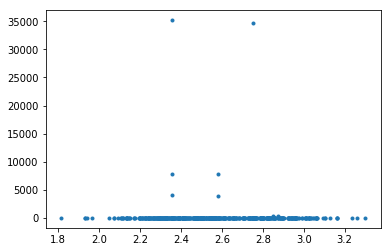

In [28]:
plt.plot(alpha_div_tp1s, num_SNP_changes_all, '.')
plt.show()

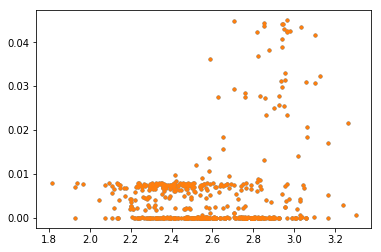

In [22]:
plt.plot(alpha_div_tp1s, polymorphism_tp1s, '.')
plt.show()

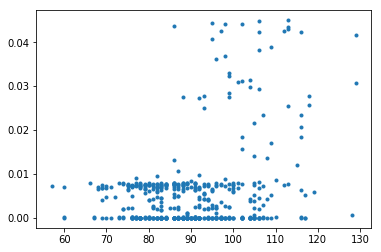

In [29]:
plt.plot(richness_tp1s, polymorphism_tp1s, '.')
plt.show()

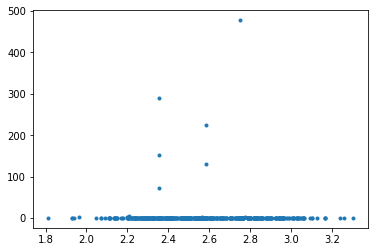

In [23]:
plt.plot(alpha_div_tp1s, num_gene_gains_all, '.')
plt.show()

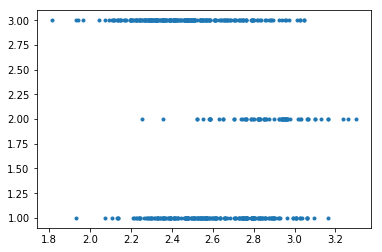

In [25]:
plt.plot(alpha_div_tp1s, num_strains_cov0_tp2s, '.')
plt.show()

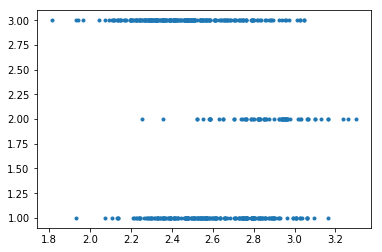

In [26]:
plt.plot(alpha_div_tp1s, num_strains_cov10_tp2s, '.')
plt.show()

In [ ]:
plt.plot(alpha_div_tp1s, num_gene_losses_all, '.')
plt.show()

In [3]:
# Investigating 'amount of evolution' vs alpha diversity
# For HMP adults only

import matplotlib.pyplot as plt

from utils import sample_utils as su, config
from utils.plot_utils import list_to_colors, colors_to_legend_elements, get_species_color_map

import sys, numpy as np
from collections import defaultdict

sweep_type = 'full'

# Load pickled data

import pickle
pickle_dir = "%s/pickles" % config.data_directory

alpha_div_dict = pickle.load(open("%s/alpha_div_dict.pkl" % (pickle_dir), 'rb'))
host_snp_change_dict = pickle.load(open("%s/host_snp_change_dict_%s.pkl" % (pickle_dir, sweep_type), 'rb'))
host_species_snp_change_dict = pickle.load(open("%s/host_species_snp_change_dict_%s.pkl" % (pickle_dir, sweep_type), 'rb'))
host_alpha_diversity_dict = pickle.load(open("%s/host_alpha_diversity_dict.pkl" % (pickle_dir), 'rb'))
host_change_type_dict = pickle.load(open("%s/host_change_type_dict_%s.pkl" % (pickle_dir, sweep_type), 'rb'))
sample_species_polymorphism_dict = pickle.load(open("%s/sample_species_polymorphism_dict_%s.pkl" % (pickle_dir, sweep_type), 'rb'))
# sample_species_polymorphism_nd_dict = pickle.load(open("%s/sample_species_polymorphism_nd_dict.pkl" % (pickle_dir), 'rb'))

alpha_div_dict = pickle.load(open("%s/alpha_div_dict.pkl" % (pickle_dir), 'rb'))
host_alpha_diversity_dict = pickle.load(open("%s/host_alpha_diversity_dict.pkl" % (pickle_dir), 'rb'))
host_gene_gain_dict = pickle.load(open("%s/host_gene_gain_dict.pkl" % (pickle_dir), 'rb'))
host_gene_loss_dict = pickle.load(open("%s/host_gene_loss_dict.pkl" % (pickle_dir), 'rb'))
host_species_gene_gain_dict = pickle.load(open("%s/host_species_gene_gain_dict.pkl" % (pickle_dir), 'rb'))
host_species_gene_loss_dict = pickle.load(open("%s/host_species_gene_loss_dict.pkl" % (pickle_dir), 'rb'))

# Load species color map
species_color_map, ordered_species_list = get_species_color_map()

utils/plot_utils.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/u/local/apps/python/2.7.13/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/u/local/apps/python/2.7.13/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/u/local/apps/python/2.7.13/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/u/local/apps/python/2.7.13/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/u/local/apps/python/2.7.13/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOL

In [3]:
orig_read_count_dict = su.parse_sample_read_count_map()
samples = orig_read_count_dict.keys()
for sample in samples:
    if sample[-1:] == 'c':
        orig_read_count_dict[sample[:-1]] = orig_read_count_dict[sample]

AttributeError: 'module' object has no attribute 'parse_sample_read_count_map'

In [22]:
# Set up within-sample polymorphism num/denom
# data for plot: polymorphism vs read count

sample_species_polymorphisms = []
sample_species_polymorphisms_alt = []
sample_species_polymorphism_nums = []
sample_species_polymorphism_dens = []

sample_species_alpha_diversities = []
sample_species_read_counts = []

for sample in sample_species_polymorphism_dict:
    
    read_counts = orig_read_count_dict[sample]
    alpha_div = alpha_div_dict[sample]
    
    for species in sample_species_polymorphism_dict[sample]:
        
        num, den = sample_species_polymorphism_nd_dict[sample][species]
        poly = sample_species_polymorphism_dict[sample][species]
        
        sample_species_polymorphisms.append(poly)
        sample_species_polymorphisms_alt.append(float(num)/den)
        sample_species_polymorphism_nums.append(num)
        sample_species_polymorphism_dens.append(den)
        sample_species_alpha_diversities.append(alpha_div)
        sample_species_read_counts.append(read_counts)

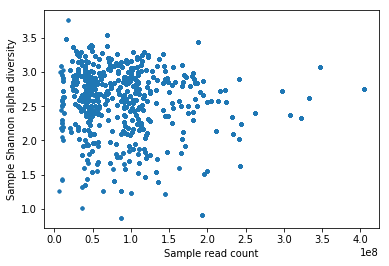

In [21]:
plt.plot(sample_species_read_counts, sample_species_alpha_diversities, '.')
plt.xlabel("Sample read count")
plt.ylabel("Sample Shannon alpha diversity")
plt.show()

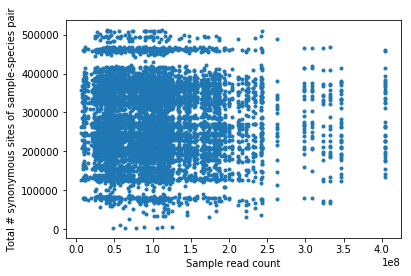

In [16]:
plt.plot(sample_species_read_counts, sample_species_polymorphism_dens, '.')
plt.xlabel("Sample read count")
plt.ylabel("Total # synonymous sites of sample-species pair")
plt.show()

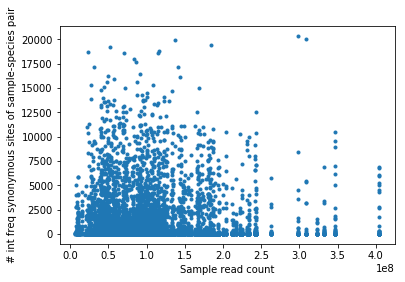

In [17]:
plt.plot(sample_species_read_counts, sample_species_polymorphism_nums, '.')
plt.xlabel("Sample read count")
plt.ylabel("# int freq synonymous sites of sample-species pair")
plt.show()

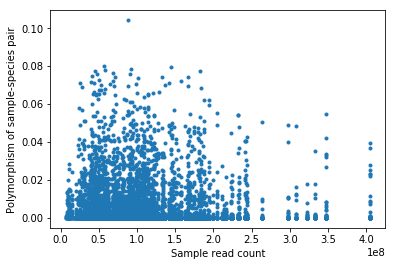

In [14]:
plt.plot(sample_species_read_counts, sample_species_polymorphisms, '.')
plt.xlabel("Sample read count")
plt.ylabel("Polymorphism of sample-species pair")
plt.show()

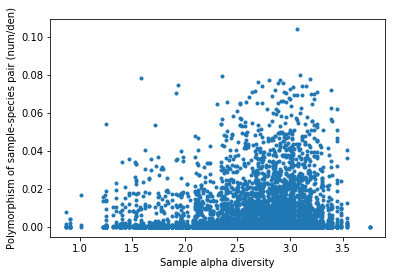

In [25]:
plt.plot(sample_species_alpha_diversities, sample_species_polymorphisms_alt, '.')
plt.xlabel("Sample alpha diversity")
plt.ylabel("Polymorphism of sample-species pair (num/den)")
plt.show()

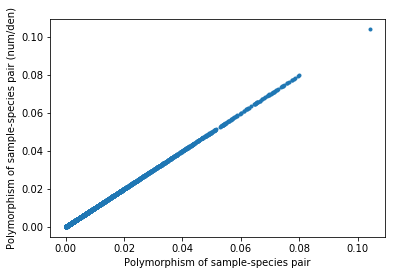

In [26]:
plt.plot(sample_species_polymorphisms, sample_species_polymorphisms_alt, '.')
plt.xlabel("Polymorphism of sample-species pair")
plt.ylabel("Polymorphism of sample-species pair (num/den)")
plt.show()

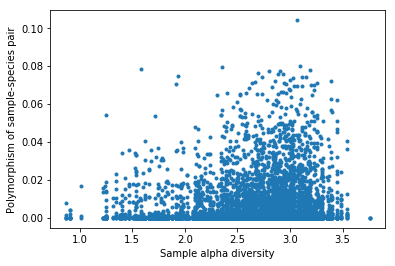

In [20]:
plt.plot(sample_species_alpha_diversities, sample_species_polymorphisms, '.')
plt.xlabel("Sample alpha diversity")
plt.ylabel("Polymorphism of sample-species pair")
plt.show()

In [13]:
# Set up within-sample polymorphism data for plot (original)
sample_species_alpha_diversities = []
sample_species_polymorphisms = []
host_species_species_poly = []
host_species_species_nonzero = []

sample_genus_alpha_diversities = []
sample_genus_polymophisms = []
host_species_genus_poly = []

sample_alpha_diversities = []
sample_polymorphisms = []

for sample in sample_species_polymorphism_dict:
    sample_alpha_diversities.append(alpha_div_dict[sample])
    agg_polymorphism = 0
    for species in sample_species_polymorphism_dict[sample]:
        sample_species_alpha_diversities.append(alpha_div_dict[sample])
        sample_species_polymorphisms.append(sample_species_polymorphism_dict[sample][species])
        agg_polymorphism += sample_species_polymorphism_dict[sample][species]
        host_species_species_poly.append(species)
        if sample_species_polymorphism_dict[sample][species] > 0.001:
            host_species_species_nonzero.append(species)
        else:
            host_species_species_nonzero.append('-')
    sample_polymorphisms.append(agg_polymorphism/len(sample_species_polymorphism_dict[sample]))

In [14]:
# Set up within-sample polymorphism data for plot (reordered)
species_alpha_diversities = defaultdict(list)
species_polymorphisms = defaultdict(list)

for sample in sample_species_polymorphism_dict:
    for species in sample_species_polymorphism_dict[sample]:
        
        if sample_species_polymorphism_dict[sample][species] < 0.001:
            species_alpha_diversities[species].append(alpha_div_dict[sample])
            species_polymorphisms[species].append(sample_species_polymorphism_dict[sample][species])
        else:
            species_alpha_diversities['-'].append(alpha_div_dict[sample])
            species_polymorphisms['-'].append(sample_species_polymorphism_dict[sample][species])

sample_species_alpha_diversities = []
sample_species_polymorphisms = []
host_species_species_nonzero = []

for species in ['-'] + ordered_species_list:
    sample_species_alpha_diversities += species_alpha_diversities[species]
    sample_species_polymorphisms += species_polymorphisms[species]
    host_species_species_nonzero += ([species] * len(species_polymorphisms[species]))

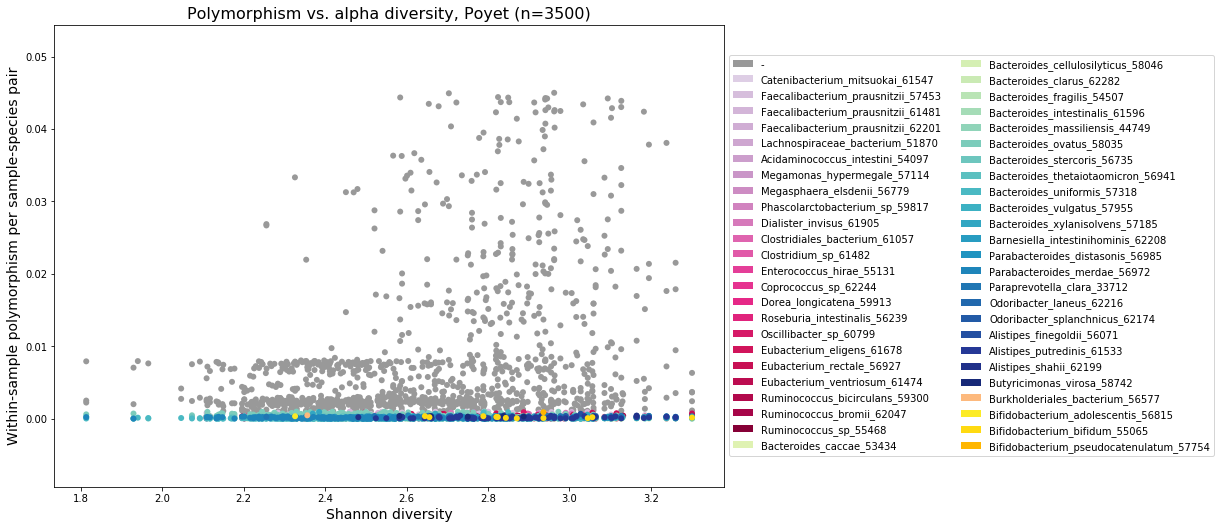

In [15]:
# Plot 0: sample-species alpha diversity vs. polymorphism
fig, ax = plt.subplots(figsize=(15,8.5))
colors = [species_color_map[species] for species in host_species_species_nonzero]
ax.scatter(sample_species_alpha_diversities, sample_species_polymorphisms, c=colors, edgecolors='none')
ax.set_xlabel("Shannon diversity", fontsize=14)
ax.set_ylabel("Within-sample polymorphism per sample-species pair", fontsize=14)
ax.set_title("Polymorphism vs. alpha diversity, Poyet (n=%i)" % len(sample_species_polymorphisms), fontsize=16)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, host_species_species_nonzero), ncol=2, fontsize='medium', bbox_to_anchor=(1, 0.5))
fig.savefig('%s/polymorphism_vs_alpha_div_by_species.pdf' % (config.analysis_directory), bbox_inches='tight')
plt.show()

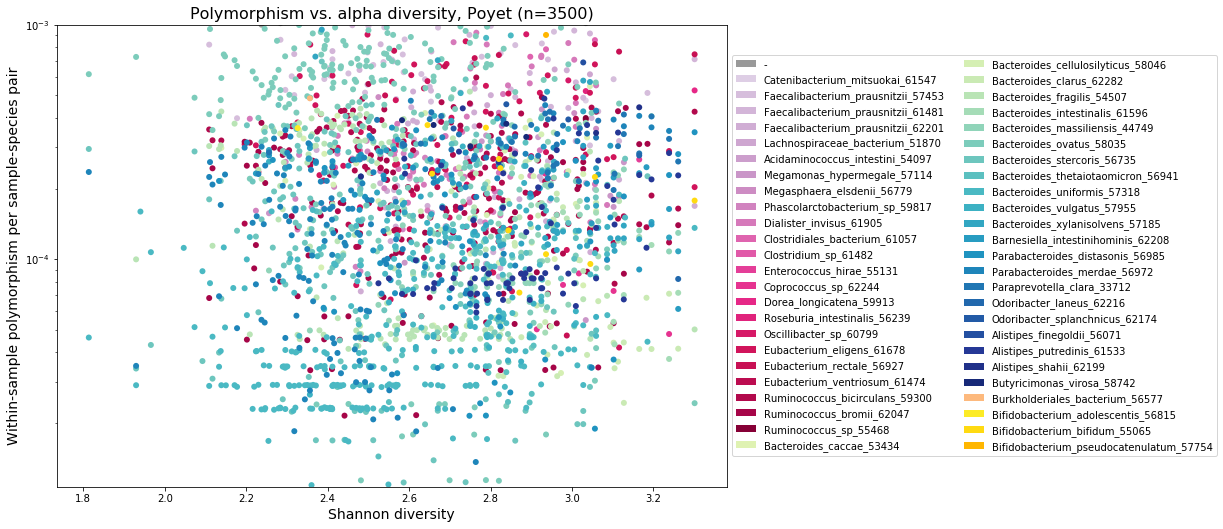

In [17]:
# log scale, cut off high 'polymorphism'
# Plot 0: sample-species alpha diversity vs. polymorphism
fig, ax = plt.subplots(figsize=(15,8.5))
colors = [species_color_map[species] for species in host_species_species_nonzero]
ax.set_yscale('log')
ax.scatter(sample_species_alpha_diversities, sample_species_polymorphisms, c=colors, edgecolors='none')
ax.set_ylim((0, 0.001))

ax.set_xlabel("Shannon diversity", fontsize=14)
ax.set_ylabel("Within-sample polymorphism per sample-species pair", fontsize=14)
ax.set_title("Polymorphism vs. alpha diversity, Poyet (n=%i)" % len(sample_species_polymorphisms), fontsize=16)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, host_species_species_nonzero), ncol=2, fontsize='medium', bbox_to_anchor=(1, 0.5))
fig.savefig('%s/polymorphism_vs_alpha_div_by_species.pdf' % (config.analysis_directory), bbox_inches='tight')

plt.show()

In [43]:
# Quick plot utils color testing...
n = 4
norm = matplotlib.colors.Normalize(vmin=-2, vmax=n+1)
cmap = matplotlib.cm.PuRd
m = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

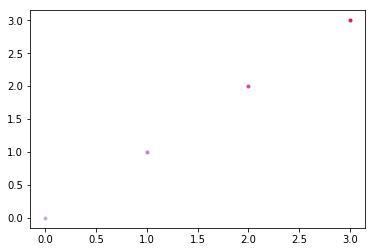

In [41]:
for i in [0, 1, 2, 3]:
    plt.plot([i], [i], '.', color=m.to_rgba(i))
plt.show()

In [7]:
# Compute 'DBD' slopes for each species and plot those with the strongest
species_dbd_dict = {}

for sample in sample_species_polymorphism_dict:
    for species in sample_species_polymorphism_dict[sample]:
        polymorphism = sample_species_polymorphism_dict[sample][species]
        alpha_div = alpha_div_dict[sample]
        if species not in species_dbd_dict:
            species_dbd_dict[species] = ([], [])
        species_dbd_dict[species][0].append(polymorphism)
        species_dbd_dict[species][1].append(alpha_div)

In [8]:
species_dbd_slope_dict = {}
species_dbd_r2_dict = {}

for species in species_dbd_dict:
    polys, adivs = species_dbd_dict[species]
    # Only look at species if it exists in at least 3 samples
    if len(polys) < 3:
        continue
    m, b = np.polyfit(adivs, polys, 1)
    species_dbd_slope_dict[species] = m
    species_dbd_r2_dict[species] = np.corrcoef(adivs, polys)[0, 1]**2

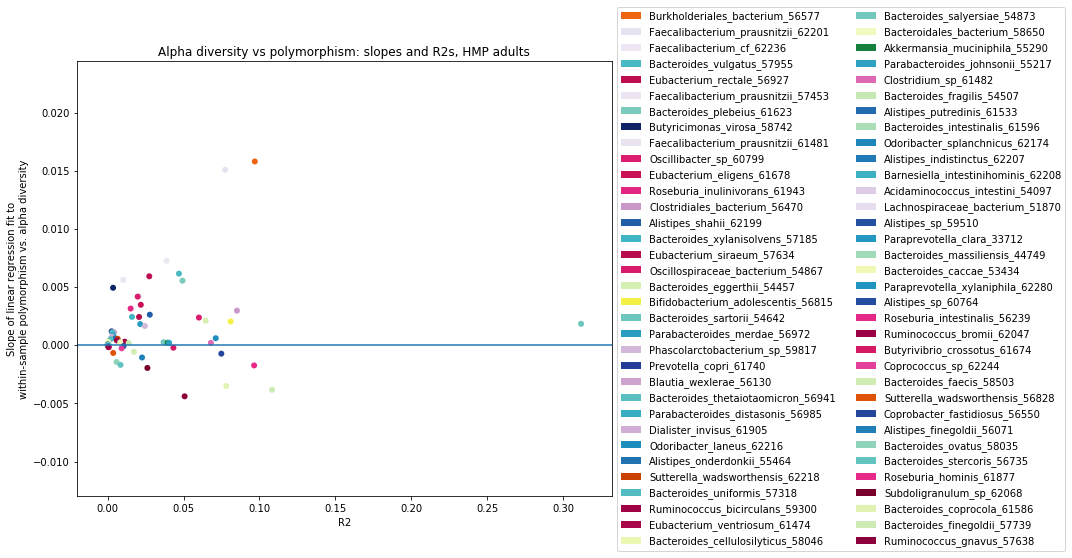

In [64]:
species_dbd_slopes = []
species_dbd_r2s = []
species_list, _ = zip(*sorted(species_dbd_slope_dict.items(), key=lambda item: item[1], reverse=True))
colors = []

plot_species_list = species_list

for species in species_list:
    species_dbd_slopes.append(species_dbd_slope_dict[species])
    species_dbd_r2s.append(species_dbd_r2_dict[species])
    colors.append(species_color_map[species])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(species_dbd_r2s, species_dbd_slopes, c=colors, edgecolors='none')
ax.set_xlabel("R2")
ax.set_ylabel("Slope of linear regression fit to\nwithin-sample polymorphism vs. alpha diversity")
ax.set_title("Alpha diversity vs polymorphism: slopes and R2s, HMP adults")
ax.axhline(y=0)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, plot_species_list), ncol=2, fontsize='medium', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig('%s/dbd_slopes_r2s.pdf' % (config.analysis_directory), bbox_inches='tight')

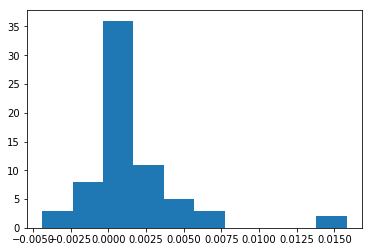

In [11]:
plt.hist(species_dbd_slopes)
plt.show()

In [12]:
# Fanciful idea 1: maybe relative abundance correlates with DBD slope!
# Start by averaging relative abundance over samples. Probably varies a lot, but we'll see...
import bz2

species_avg_relab = {}

# Relative abundance file
relab_fpath = "%s/species/relative_abundance.txt.bz2" % config.data_directory
relab_file = bz2.BZ2File(relab_fpath, 'r')
data = [row.strip().split('\t') for row in relab_file]
samples = su.parse_merged_sample_names(data[0][1:])

for species_line in data[1:]:
    species = species_line[0]
    species_avg_relab[species] = np.mean([float(n) for n in species_line[1:]])

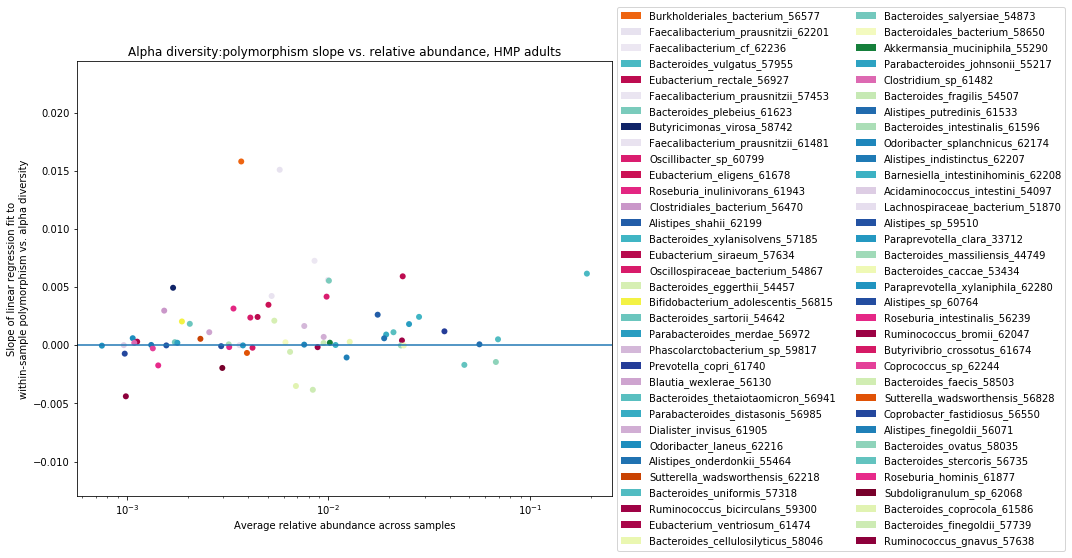

In [42]:
species_dbd_slopes = []
species_avg_relabs = []
species_list, _ = zip(*sorted(species_dbd_slope_dict.items(), key=lambda item: item[1], reverse=True))
colors = []

for species in species_list:
    species_dbd_slopes.append(species_dbd_slope_dict[species])
    species_avg_relabs.append(species_avg_relab[species])
    colors.append(species_color_map[species])

fig, ax = plt.subplots(figsize=(12,8))
ax.set_xscale('log') # Use log scale since range of relabs should range quite a bit
ax.scatter(species_avg_relabs, species_dbd_slopes, c=colors, edgecolors='none')
ax.set_xlabel("Average relative abundance across samples")
ax.set_ylabel("Slope of linear regression fit to\nwithin-sample polymorphism vs. alpha diversity")
ax.set_title("Alpha diversity:polymorphism slope vs. relative abundance, HMP adults")
ax.axhline(y=0)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, species_list), ncol=2, fontsize='medium', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig('%s/dbd_slopes_relabs.pdf' % (config.analysis_directory), bbox_inches='tight')

In [ ]:
# 

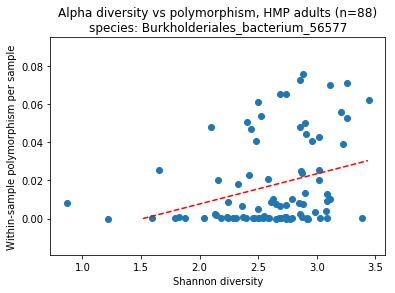

In [25]:
# Let's plot some of these species individually
species = 'Burkholderiales_bacterium_56577'
'''
 'Faecalibacterium_prausnitzii_62201',
 'Faecalibacterium_cf_62236',
 'Bacteroides_vulgatus_57955',
 'Eubacterium_rectale_56927',
 'Faecalibacterium_prausnitzii_57453'
'''
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(max(-b/m, min(x)), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism per sample")
ax.set_title("Alpha diversity vs polymorphism, HMP adults (n=%i)\nspecies: %s" % (len(x), species))
plt.show()

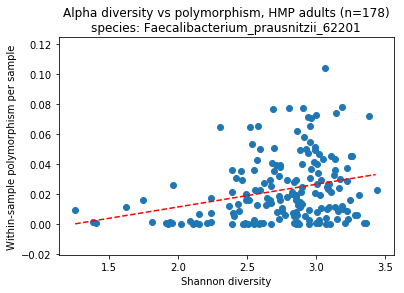

In [26]:
# Let's plot some of these species individually
species = 'Faecalibacterium_prausnitzii_62201'
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(max(-b/m, min(x)), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism per sample")
ax.set_title("Alpha diversity vs polymorphism, HMP adults (n=%i)\nspecies: %s" % (len(x), species))
plt.show()

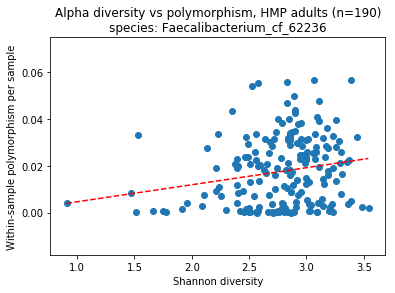

In [27]:
# Let's plot some of these species individually
species = 'Faecalibacterium_cf_62236'
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(max(-b/m, min(x)), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism per sample")
ax.set_title("Alpha diversity vs polymorphism, HMP adults (n=%i)\nspecies: %s" % (len(x), species))
plt.show()

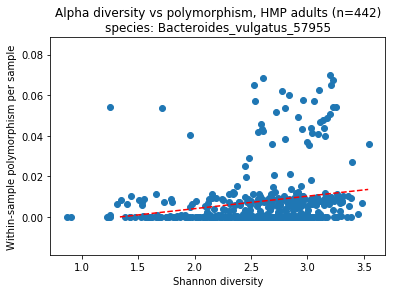

In [28]:
# Let's plot some of these species individually
species = 'Bacteroides_vulgatus_57955'
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(max(-b/m, min(x)), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism per sample-species pair")
ax.set_title("Alpha diversity vs polymorphism, HMP adults (n=%i)\nspecies: %s" % (len(x), species))
plt.show()

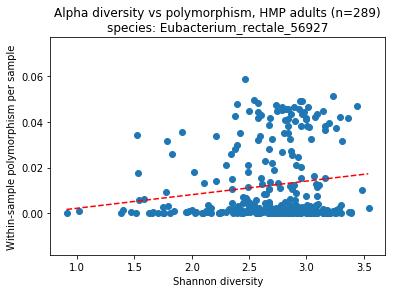

In [29]:
# Let's plot some of these species individually
species = 'Eubacterium_rectale_56927'
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(max(-b/m, min(x)), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism per sample")
ax.set_title("Alpha diversity vs polymorphism, HMP adults (n=%i)\nspecies: %s" % (len(x), species))
plt.show()

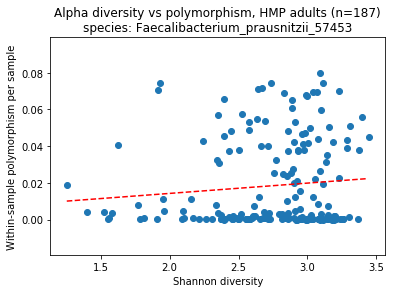

In [30]:
# Let's plot some of these species individually
species = 'Faecalibacterium_prausnitzii_57453'
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(max(-b/m, min(x)), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism per sample")
ax.set_title("Alpha diversity vs polymorphism, HMP adults (n=%i)\nspecies: %s" % (len(x), species))
plt.show()

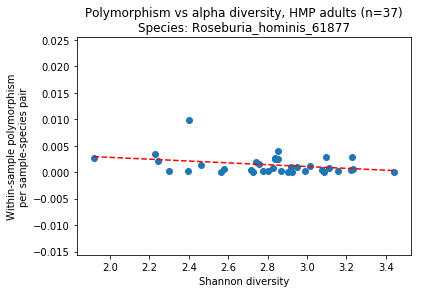

In [62]:
# Species in which DBD does not seem apparent
# Although there is a consistent lack of within-sample polymorphism
# in samples with very low Shannon diversity (<1.5 ish)
# regardless of species

species = 'Roseburia_hominis_61877'
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(min(x), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism\nper sample-species pair")
ax.set_title("Polymorphism vs alpha diversity, HMP adults (n=%i)\nSpecies: %s" % (len(x), species))
fig.savefig("%s/polymorphism_vs_alpha_div_%s.pdf" % (config.analysis_directory, species), bbox_inches='tight')
plt.show()

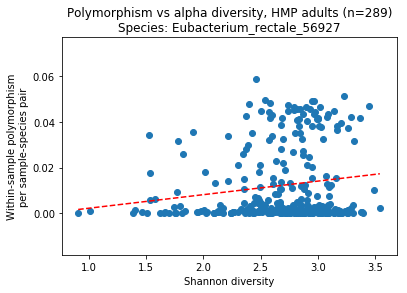

In [77]:
# Species in which DBD does not seem apparent
# Although there is a consistent lack of within-sample polymorphism
# in samples with very low Shannon diversity (<1.5 ish)
# regardless of species

species = plot_species_list[4]
y, x = species_dbd_dict[species]

fig, ax = plt.subplots()
ax.scatter(x, y)
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(min(x), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Within-sample polymorphism\nper sample-species pair")
ax.set_title("Polymorphism vs alpha diversity, HMP adults (n=%i)\nSpecies: %s" % (len(x), species))
fig.savefig("%s/polymorphism_vs_alpha_div_%s.pdf" % (config.analysis_directory, species), bbox_inches='tight')
plt.show()

In [84]:
# Let's see if this matches up with the resident/generalist classifications Madi et al. found
genus_biome_dict = {}

In [93]:
# Set up modification SNP change data for plot
host_alpha_diversities = []
host_snp_change_counts = []

for subject in host_alpha_diversity_dict:
	host_alpha_diversities.append(host_alpha_diversity_dict[subject][0])
	host_snp_change_counts.append(host_snp_change_dict[subject])

host_species_alpha_diversities = []
host_species_snp_change_counts = []
host_species_species = []
host_species_species_nonzero = []
host_species_genera = []
host_species_genera_nonzero = []

for subject, species in host_species_snp_change_dict:
    
    genus = species_to_genus(species)
    
    if subject in host_alpha_diversity_dict:
        host_species_alpha_diversities.append(host_alpha_diversity_dict[subject][0])
        host_species_snp_change_counts.append(host_species_snp_change_dict[(subject, species)])
        host_species_species.append(species)
        host_species_genera.append(genus)
        if host_species_snp_change_dict[(subject, species)] != 0:
            host_species_species_nonzero.append(species)
        else:
            host_species_species_nonzero.append('-')
        if host_species_snp_change_dict[(subject, species)] != 0:
            host_species_genera_nonzero.append(genus)
        else:
            host_species_genera_nonzero.append('-')

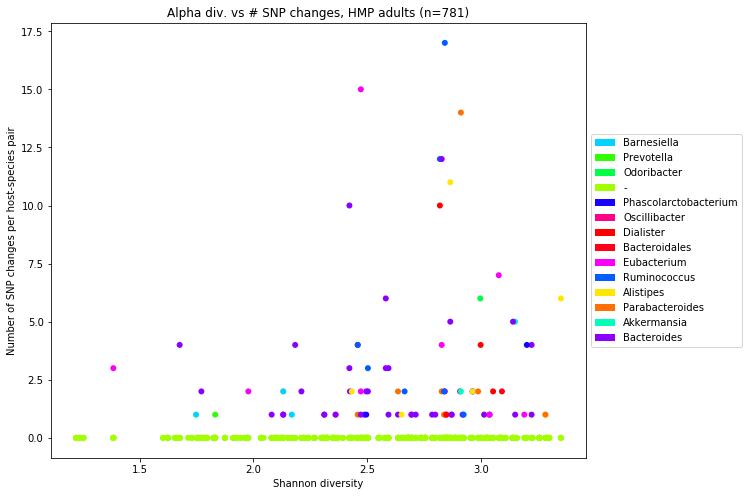

In [95]:
# Plot 2: one point per host-species pair
fig, ax = plt.subplots(figsize=(12,8))
colors = list_to_colors(host_species_genera_nonzero)
ax.scatter(host_species_alpha_diversities, host_species_snp_change_counts, c=colors, edgecolors='none')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Number of SNP changes per host-species pair")
ax.set_title("Alpha div. vs # SNP changes, HMP adults (n=%i)" % len(host_species_snp_change_counts))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, host_species_genera_nonzero), fontsize='medium', bbox_to_anchor=(1, 0.5))

plt.show()

In [7]:
# Set up modification SNP change data for plot

species_alpha_diversities = defaultdict(list)
species_snp_change_counts = defaultdict(list)

for subject, species in host_species_snp_change_dict:
    if host_species_snp_change_dict[(subject, species)] != 0:
        species_alpha_diversities[species].append(host_alpha_diversity_dict[subject][0])
        species_snp_change_counts[species].append(host_species_snp_change_dict[(subject, species)])
    else:
        species_alpha_diversities['-'].append(host_alpha_diversity_dict[subject][0])
        species_snp_change_counts['-'].append(host_species_snp_change_dict[(subject, species)])
    
host_species_alpha_diversities = []
host_species_snp_change_counts = []
host_species_species_nonzero = []
colors = []

for species in ['-'] + ordered_species_list:
    if species in species_snp_change_counts:
        host_species_alpha_diversities += species_alpha_diversities[species]
        host_species_snp_change_counts += species_snp_change_counts[species]
        host_species_species_nonzero += ([species] * len(species_snp_change_counts[species]))
        colors += ([species_color_map[species]] * len(species_snp_change_counts[species]))

host_species_alpha_diversities_mod_only = []
host_species_snp_change_counts_mod_only = []

for species in ordered_species_list:
    if species in species_snp_change_counts:
        host_species_alpha_diversities_mod_only += species_alpha_diversities[species]
        host_species_snp_change_counts_mod_only += species_snp_change_counts[species]

In [9]:
host_species_snp_change_counts

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

/u/local/apps/python/2.7.13/lib/python2.7/site-packages/ipykernel/__main__.py:5: RankWarning: Polyfit may be poorly conditioned


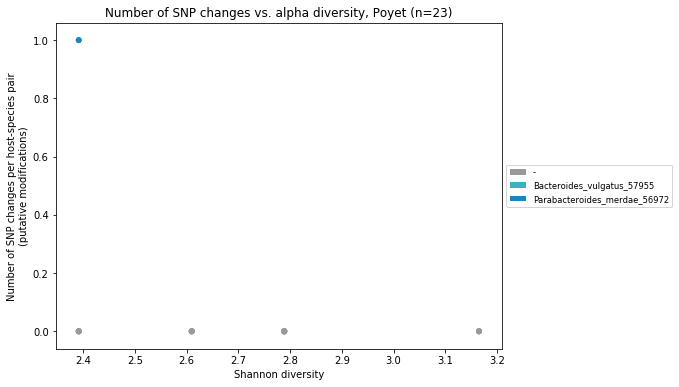

In [10]:
# Plot 2: one point per host-species pair
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(host_species_alpha_diversities, host_species_snp_change_counts, c=colors, edgecolors='none')
x, y = host_species_alpha_diversities_mod_only, host_species_snp_change_counts_mod_only
m, b = np.polyfit(x, y, 1)
dense_x = np.arange(min(x), max(x), 0.01)
ax.plot(dense_x, m*dense_x + b, 'r--')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Number of SNP changes per host-species pair\n(putative modifications)")
ax.set_title("Number of SNP changes vs. alpha diversity, Poyet (n=%i)" % len(host_species_snp_change_counts))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, host_species_species_nonzero), fontsize='small', bbox_to_anchor=(1, 0.5))
fig.savefig('%s/snp_changes_vs_alpha_div.pdf' % (config.analysis_directory), bbox_inches='tight')
plt.show()

In [13]:
# Set up gene gain/loss data for plot

host_alpha_diversities = []
host_gene_gain_counts = []
host_gene_loss_counts = []

host_alpha_div_diffs = []
host_gene_gain_counts_for_diffs = []
host_gene_loss_counts_for_diffs = []

for subject in host_alpha_diversity_dict:
	alpha_div1, alpha_div2 = host_alpha_diversity_dict[subject]
	gain_count = host_gene_gain_dict[subject]
	loss_count = host_gene_loss_dict[subject]
	
	if alpha_div1 != None:
		host_alpha_diversities.append(alpha_div1)
		host_gene_gain_counts.append(gain_count)
		host_gene_loss_counts.append(loss_count)
	
	if alpha_div1 != None and alpha_div2 != None:
		alpha_div_diff = alpha_div2 - alpha_div1
		host_alpha_div_diffs.append(alpha_div_diff)
		host_gene_gain_counts_for_diffs.append(gain_count)
		host_gene_loss_counts_for_diffs.append(loss_count)

host_gene_change_counts = np.array(host_gene_gain_counts) + np.array(host_gene_loss_counts)
host_gene_change_counts_for_diffs = np.array(host_gene_gain_counts_for_diffs) + np.array(host_gene_loss_counts_for_diffs)

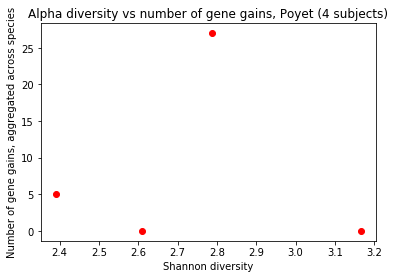

In [15]:
# Plot 1: one point per host, aggregate across species
fig, ax = plt.subplots()
ax.plot(host_alpha_diversities, host_gene_gain_counts, 'ro', label='Gene gains')
# ax.set_yscale('log')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Number of gene gains, aggregated across species")
ax.set_title("Alpha diversity vs number of gene gains, Poyet (%i subjects)" % len(host_gene_gain_counts))
plt.show()

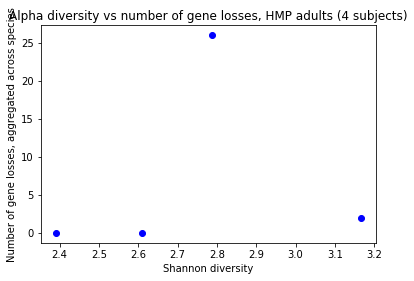

In [16]:
fig, ax = plt.subplots()
ax.plot(host_alpha_diversities, host_gene_loss_counts, 'bo', label='Gene losses')
# ax.set_yscale('log')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Number of gene losses, aggregated across species")
ax.set_title("Alpha diversity vs number of gene losses, HMP adults (%i subjects)" % len(host_gene_loss_counts))
plt.show()

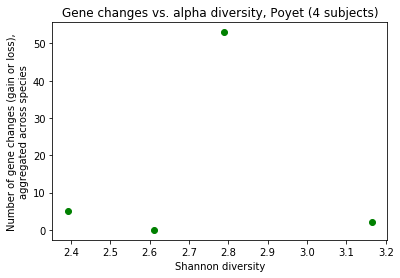

In [19]:
fig, ax = plt.subplots()
ax.plot(host_alpha_diversities, host_gene_change_counts, 'go', label='Combined')
# ax.set_yscale('log')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Number of gene changes (gain or loss),\naggregated across species")
ax.set_title("Gene changes vs. alpha diversity, Poyet (%i subjects)" % len(host_gene_change_counts))
plt.show()

In [13]:
# Set up gene gain data for plot

species_alpha_diversities = defaultdict(list)
species_alpha_div_diffs = defaultdict(list)
species_gene_gains = defaultdict(list)

for subject, species in host_species_gene_gain_dict:
    
    gain_count = host_species_gene_gain_dict[(subject, species)]
    alpha_div1, alpha_div2 = host_alpha_diversity_dict[subject]
    
    if gain_count != 0:
        species_alpha_diversities[species].append(alpha_div1)
        species_alpha_div_diffs[species].append(alpha_div2 - alpha_div1)
        species_gene_gains[species].append(gain_count)
    else:
        species_alpha_diversities['-'].append(alpha_div1)
        species_alpha_div_diffs['-'].append(alpha_div2 - alpha_div1)
        species_gene_gains['-'].append(gain_count)

host_species_gene_gain_alpha_divs = []
host_species_gene_gain_alpha_div_diffs = []
host_species_gene_gain_counts = []
host_species_gene_gain_species = []
colors = []

for species in ['-'] + ordered_species_list:
    if species in species_gene_gains:
        host_species_gene_gain_alpha_divs += species_alpha_diversities[species]
        host_species_gene_gain_alpha_div_diffs += species_alpha_div_diffs[species]
        host_species_gene_gain_counts += species_gene_gains[species]
        host_species_gene_gain_species += ([species] * len(species_gene_gains[species]))
        colors += ([species_color_map[species]] * len(species_gene_gains[species]))

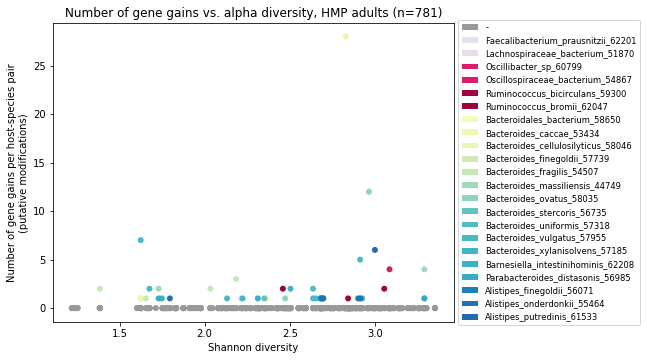

In [14]:
fig, ax = plt.subplots(figsize=(9,5.5))
ax.scatter(host_species_gene_gain_alpha_divs, host_species_gene_gain_counts, c=colors, edgecolors='none')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Number of gene gains per host-species pair\n(putative modifications)")
ax.set_title("Number of gene gains vs. alpha diversity, HMP adults (n=%i)" % len(host_species_gene_gain_counts))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, host_species_gene_gain_species), fontsize='small', bbox_to_anchor=(1, 0.5))
fig.savefig('%s/gene_gains_vs_alpha_div.pdf' % (config.analysis_directory), bbox_inches='tight')
plt.show()

In [16]:
# Set up gene loss data for plot

species_alpha_diversities = defaultdict(list)
species_alpha_div_diffs = defaultdict(list)
species_gene_loss = defaultdict(list)

for subject, species in host_species_gene_loss_dict:
    
    loss_count = host_species_gene_loss_dict[(subject, species)]
    alpha_div1, alpha_div2 = host_alpha_diversity_dict[subject]
    
    if loss_count != 0:
        species_alpha_diversities[species].append(alpha_div1)
        species_alpha_div_diffs[species].append(alpha_div2 - alpha_div1)
        species_gene_loss[species].append(loss_count)
    else:
        species_alpha_diversities['-'].append(alpha_div1)
        species_alpha_div_diffs['-'].append(alpha_div2 - alpha_div1)
        species_gene_loss['-'].append(loss_count)

host_species_gene_loss_alpha_divs = []
host_species_gene_loss_alpha_div_diffs = []
host_species_gene_loss_counts = []
host_species_gene_loss_species = []
colors = []

for species in ['-'] + ordered_species_list:
    if species in species_gene_loss:
        host_species_gene_loss_alpha_divs += species_alpha_diversities[species]
        host_species_gene_loss_alpha_div_diffs += species_alpha_div_diffs[species]
        host_species_gene_loss_counts += species_gene_loss[species]
        host_species_gene_loss_species += ([species] * len(species_gene_loss[species]))
        colors += ([species_color_map[species]] * len(species_gene_loss[species]))

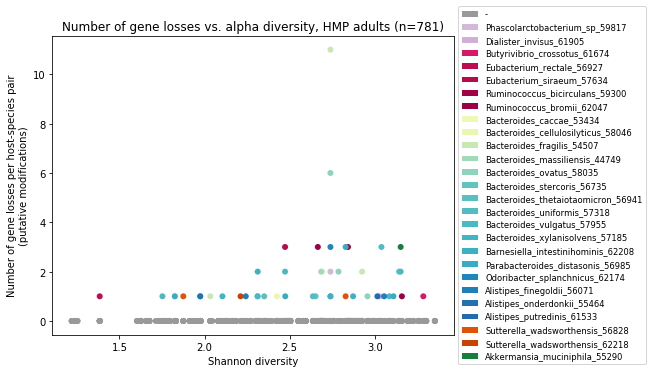

In [17]:
fig, ax = plt.subplots(figsize=(9,5.5))
# ax.set_yscale('log')
ax.scatter(host_species_gene_loss_alpha_divs, host_species_gene_loss_counts, c=colors, edgecolors='none')
ax.set_xlabel("Shannon diversity")
ax.set_ylabel("Number of gene losses per host-species pair\n(putative modifications)")
ax.set_title("Number of gene losses vs. alpha diversity, HMP adults (n=%i)" % len(host_species_gene_loss_counts))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', handles=colors_to_legend_elements(colors, host_species_gene_loss_species), fontsize='small', bbox_to_anchor=(1, 0.5))
fig.savefig('%s/gene_losses_vs_alpha_div.pdf' % (config.analysis_directory), bbox_inches='tight')
plt.show()

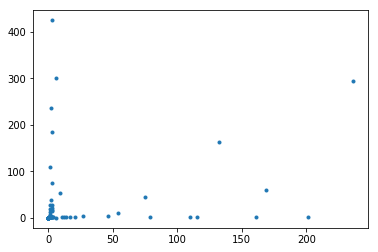

In [95]:
plt.plot(host_species_gene_loss_counts, host_species_gene_gain_counts, '.')
plt.show()

In [31]:
from utils import sample_utils as su, parse_midas_data

In [21]:
subject_sample_map = su.parse_subject_sample_map()
samples = su.get_sample_names()

In [22]:
x = su.load_qp_samples(samples, 'Bacteroides_vulgatus_57955')

In [28]:
qp_example = list(x['qp'])[0]
nonqp_example = list(x['non-qp'])[0]

In [32]:
samples, sfs_map = parse_midas_data.parse_within_sample_sfs('Bacteroides_vulgatus_57955')

In [39]:
sfs = sfs_map[qp_example]
freq_dict = defaultdict(int)
freqs = []

for D, A in sfs:
    n = sfs[(D,A)][0]
    freq = float(A)/D
    freq_dict[freq] += n
    freqs += ([freq] * n)

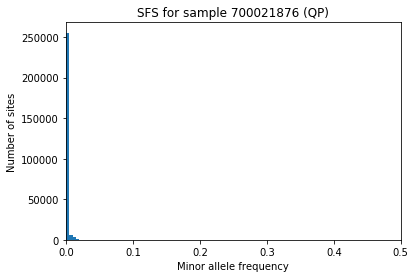

In [58]:
fig, ax = plt.subplots()
ax.hist(freqs, bins=200)
ax.set_xlim((0, 0.5))
ax.set_xlabel("Minor allele frequency")
ax.set_ylabel("Number of sites")
ax.set_title("SFS for sample %s (QP)" % qp_example)

plt.show()